In [2]:
#import dependencies
import calendar
import pandas as pd
import numpy as np
import csv
import numpy as np
from scipy.stats import linregress
from matplotlib import pyplot as plt
import hvplot.pandas

#read csv and delete unnecessary columns
wildfires_df = pd.read_csv("US_Lightning_Forest_Fires.csv")
del wildfires_df["STAT_CAUSE_DESCR"]
del wildfires_df["Unnamed: 0"]
wildfires_df.head(10)

index  FIRE_YEAR   Fire_Date  DISCOVERY_TIME  Days_to_extinguish_fire  \
0      1       2004  05-12-2004           845.0                      0.0   
1      3       2004  06-28-2004          1600.0                      5.0   
2      4       2004  06-28-2004          1600.0                      5.0   
3      5       2004  06-30-2004          1800.0                      1.0   
4      6       2004  07-01-2004          1800.0                      1.0   
5      9       2004  07-01-2004          1800.0                      1.0   
6     10       2004  07-02-2004          1830.0                      1.0   
7     11       2004  07-02-2004          1730.0                      1.0   
8     14       2004  10-03-2004           630.0                      0.0   
9     15       2004  10-03-2004           930.0                      0.0   

   CONT_TIME  FIRE_SIZE FIRE_SIZE_CLASS   LATITUDE   LONGITUDE STATE  \
0     1530.0       0.25               A  38.933056 -120.404444    CA   
1     1400.0       0.10               A  38.559167 -119.913333    CA   
2     1200.0       0.10               A  38.559167 -119.933056    CA   
3     1600.0       0.10               A  38.635278 -120.103611    CA   
4     1400.0       0.10               A  38.688333 -120.153333    CA   
5     1800.0       0.10               A  38.548333 -120.149167    CA   
6     1900.0       0.10               A  38.691667 -120.159722    CA   
7     2000.0       0.10               A  38.527500 -120.106111    CA   
8     1500.0       0.20               A  38.675833 -120.279722    CA   
9     1400.0       0.10               A  38.564167 -120.542222    CA   

   FIPS_CODE  FIPS_NAME  
0       61.0     Placer  
1        3.0     Alpine  
2        3.0     Alpine  
3        5.0     Amador  
4       17.0  El Dorado  
5        5.0     Amador  
6       17.0  El Dorado  
7        5.0     Amador  
8       17.0  El Dorado  
9       17.0  El Dorado

In [3]:
#set dataframe to Florida
Florida_df = wildfires_df.loc[wildfires_df["STATE"] == "FL"]

#display the data
Florida_df.head()

index  FIRE_YEAR   Fire_Date  DISCOVERY_TIME  Days_to_extinguish_fire  \
855    1657       2005  07-28-2005          1607.0                      3.0   
883    1701       2005  08-15-2005          1610.0                      0.0   
1238   2322       2005  08-25-2005          1630.0                      0.0   
1240   2326       2005  08-23-2005          1430.0                      0.0   
3398   7948       2006  04-18-2006          1900.0                      0.0   

      CONT_TIME  FIRE_SIZE FIRE_SIZE_CLASS   LATITUDE  LONGITUDE STATE  \
855      1307.0      21.00               C  29.413889 -81.806389    FL   
883      1758.0       2.00               B  29.366389 -81.837778    FL   
1238     1830.0       5.00               B  30.158333 -82.445000    FL   
1240     1722.0      10.00               C  30.092500 -84.532778    FL   
3398     2150.0       0.25               A  29.026944 -81.628611    FL   

      FIPS_CODE FIPS_NAME  
855         NaN       NaN  
883         NaN       NaN  
1238        NaN       NaN  
1240        NaN       NaN  
3398       83.0    Marion

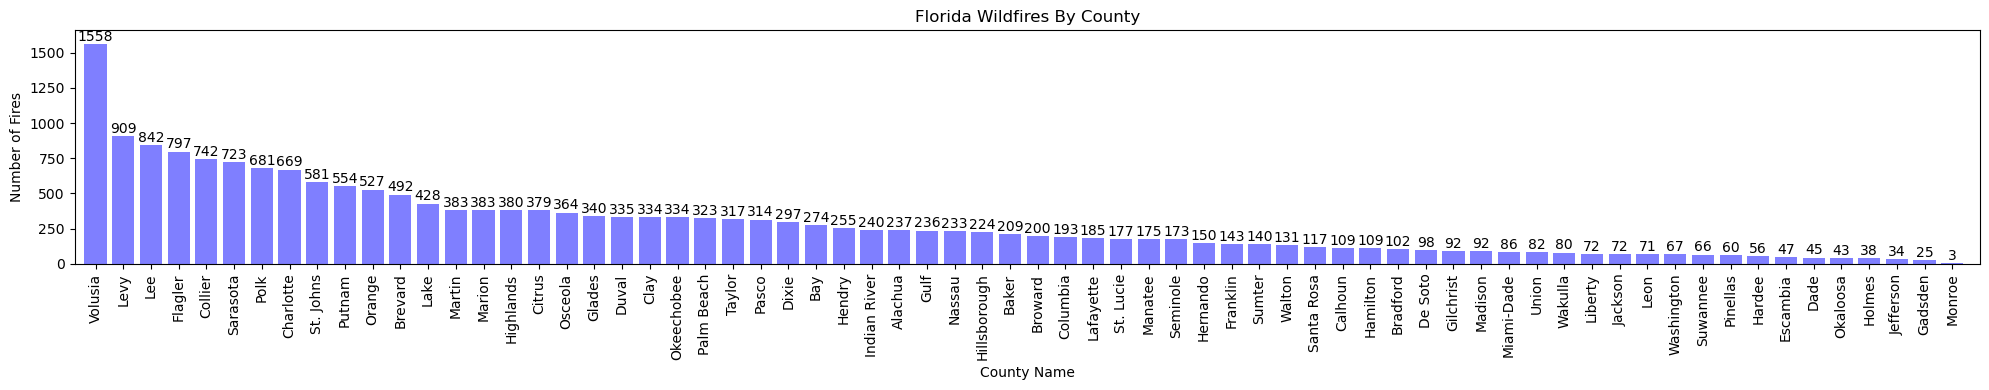

In [4]:
#determine the number of counties that reported wildfires in Florida
county_count = Florida_df["FIPS_NAME"].value_counts()

#set up a list for the county names, and append the data to the list
FL_county_name= county_count.index
FL_occurences = county_count.values

#set up visualization of number of fires per county
x_axis = np.arange(len(FL_county_name.unique()))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(20,4))
plt.bar(x_axis, FL_occurences, color='b', alpha=0.5, align='center')
plt.xticks(tick_locations, FL_county_name, rotation="vertical")
plt.xlim(-0.75, len(x_axis))
plt.ylim(0, max(FL_occurences)+100)
for i, value in enumerate(county_count):
    plt.text(i, value + 1, str(value), ha='center', va='bottom')
plt.title("Florida Wildfires By County")
plt.xlabel("County Name")
plt.ylabel("Number of Fires")
plt.tight_layout()
plt.savefig("IMAGES/FL/Florida_County.png")
plt.show()

In [5]:
#establish county dataframe
county_df = Florida_df[["LATITUDE", "LONGITUDE", "FIRE_YEAR", "FIPS_NAME", "Fire_Date"]]
county_df.head()


LATITUDE  LONGITUDE  FIRE_YEAR FIPS_NAME   Fire_Date
855   29.413889 -81.806389       2005       NaN  07-28-2005
883   29.366389 -81.837778       2005       NaN  08-15-2005
1238  30.158333 -82.445000       2005       NaN  08-25-2005
1240  30.092500 -84.532778       2005       NaN  08-23-2005
3398  29.026944 -81.628611       2006    Marion  04-18-2006

In [6]:
#create new dataframe with new column names
coordinate_df = county_df.rename(columns={"FIRE_YEAR" : "Year", "FIPS_NAME" : "County"})
coordinate_df

LATITUDE  LONGITUDE  Year      County   Fire_Date
855     29.413889 -81.806389  2005         NaN  07-28-2005
883     29.366389 -81.837778  2005         NaN  08-15-2005
1238    30.158333 -82.445000  2005         NaN  08-25-2005
1240    30.092500 -84.532778  2005         NaN  08-23-2005
3398    29.026944 -81.628611  2006      Marion  04-18-2006
...           ...        ...   ...         ...         ...
277654  25.358700 -80.423800  2015  Miami-Dade  10-09-2015
277658  25.767700 -80.672400  2015  Miami-Dade  10-11-2015
277682  30.195000 -81.711500  2015       Duval  11-04-2015
277685  27.795600 -81.323600  2015        Polk  11-09-2015
277951  26.401111 -80.450833  2015  Palm Beach  07-03-2015

[21806 rows x 5 columns]

In [7]:
#change the columns listing "NaN" for county name
county_df['FIPS_NAME'] = county_df['FIPS_NAME'].fillna("No Name Given")

#Determine the number of fires that occurred each year
yearly_fire_count = county_df["FIRE_YEAR"].value_counts()
yearly_fire_count = yearly_fire_count.sort_index()
years = yearly_fire_count.index.sort_values()

#establish x-axis and tick locations
year_x_axis = np.arange(len(yearly_fire_count.unique()))
tick_locs = [value for value in year_x_axis]


C:\Users\Tiffa\AppData\Local\Temp\ipykernel_18820\306129266.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  county_df['FIPS_NAME'] = county_df['FIPS_NAME'].fillna("No Name Given")


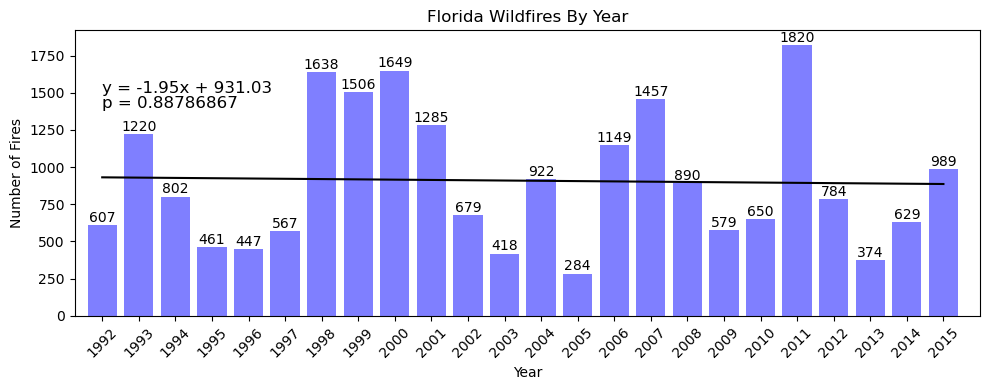

In [8]:
#calculate the linear regression for yearly fires
(slope, intercept, rvalue, pvalue, stderr) = linregress(year_x_axis, yearly_fire_count)
regress_values = year_x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
p_value = "p = " + str(round(pvalue,8))

#plot the data on a bar chart
plt.figure(figsize=(10,4))
plt.bar(year_x_axis, yearly_fire_count, color='b', alpha=0.5, align='center')
plt.xticks(tick_locs, years, rotation=45)
plt.xlim(-0.75, len(year_x_axis))
plt.ylim(0, max(yearly_fire_count)+100)
plt.title("Florida Wildfires By Year")
plt.xlabel("Year")
plt.ylabel("Number of Fires")
for i, value in enumerate(yearly_fire_count):
    plt.text(i, value + 1, str(value), ha='center', va='bottom')
plt.annotate(line_eq,(0,1500),fontsize=12,color="black")
plt.annotate(p_value, (0,1400), fontsize=12, color='black')
plt.plot(year_x_axis, regress_values, "black")
plt.tight_layout()
plt.savefig("IMAGES/FL/Florida_Fire_by_Year.png")
plt.show()

In [9]:
#establish a dataframe for calculating the dates and months
Date_df = county_df[["Fire_Date", "FIPS_NAME"]]

#convert dataframe to datetime
Date_df['Fire_Date'] = pd.to_datetime(Date_df['Fire_Date'], format='%m-%d-%Y')
Date_df["Month"] = Date_df["Fire_Date"].dt.month

#convert month column from numerical values to the name of each month
Date_df["Month"] = Date_df["Month"].apply(lambda x: calendar.month_name[x])
Date_df.head()

C:\Users\Tiffa\AppData\Local\Temp\ipykernel_18820\1331560021.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Date_df['Fire_Date'] = pd.to_datetime(Date_df['Fire_Date'], format='%m-%d-%Y')
C:\Users\Tiffa\AppData\Local\Temp\ipykernel_18820\1331560021.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Date_df["Month"] = Date_df["Fire_Date"].dt.month
C:\Users\Tiffa\AppData\Local\Temp\ipykernel_18820\1331560021.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

Fire_Date      FIPS_NAME   Month
855  2005-07-28  No Name Given    July
883  2005-08-15  No Name Given  August
1238 2005-08-25  No Name Given  August
1240 2005-08-23  No Name Given  August
3398 2006-04-18         Marion   April

In [10]:
#create a use a categorical arrangement to organizee the dataframe chronoligcally by month
months_categories = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
Date_df["Month"] = pd.Categorical(Date_df["Month"], categories = months_categories)
Date_df.sort_values(by = "Month")

C:\Users\Tiffa\AppData\Local\Temp\ipykernel_18820\1425822551.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Date_df["Month"] = pd.Categorical(Date_df["Month"], categories = months_categories)


Fire_Date   FIPS_NAME     Month
166659 2006-01-15      Martin   January
265913 2014-01-18     Volusia   January
198571 2000-01-17   Highlands   January
191759 2000-01-24  Santa Rosa   January
233428 2011-01-07    Sarasota   January
...           ...         ...       ...
194460 1995-12-14      Holmes  December
241797 2012-12-15    Columbia  December
235143 2011-12-12     Madison  December
163557 2007-12-16       Pasco  December
194461 1995-12-19        Polk  December

[21806 rows x 3 columns]

In [11]:
#determine the number of fires per month
monthly_fire_count = Date_df["Month"].value_counts()
monthly_fire_count = monthly_fire_count.sort_index()
months = monthly_fire_count.index.sort_values()

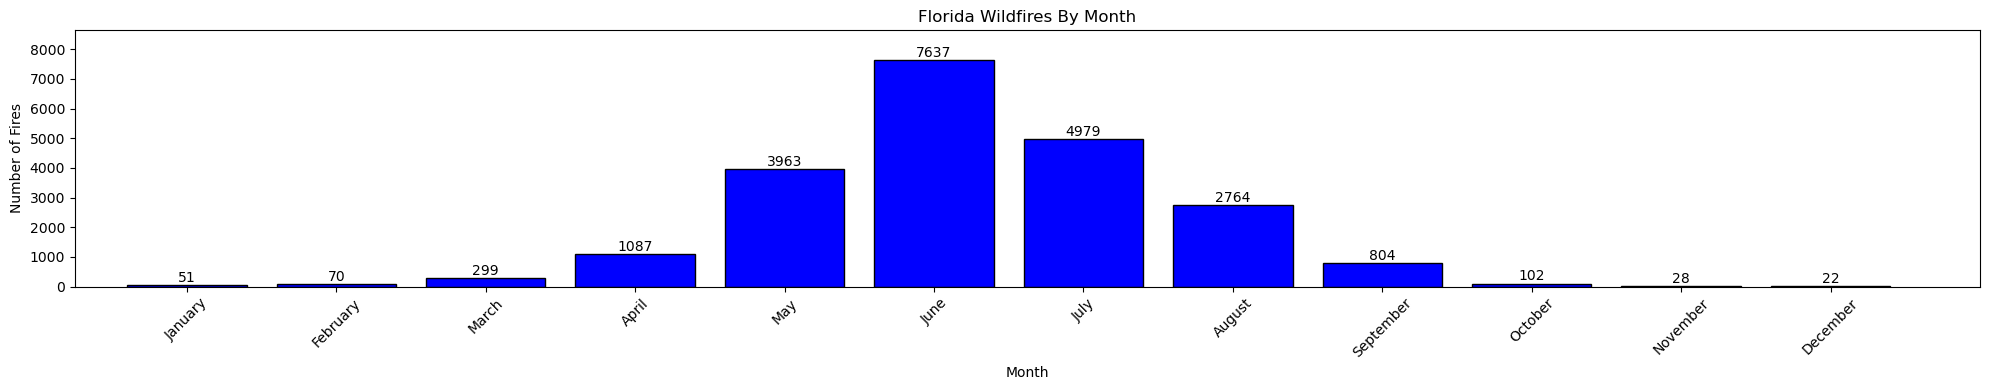

In [12]:
#set up x_axis and tick locations for graphing 
monthly_x_axis = np.arange(len(months.unique()))
month_tick_locations = [value for value in monthly_x_axis]

#graph the number of fires by month to determine if there is a season more prone to fires
plt.figure(figsize=(20,4))
plt.bar(monthly_x_axis, monthly_fire_count, color='blue', edgecolor='black')
plt.xticks(month_tick_locations, months, rotation=45)
plt.xlim(-0.75, len(monthly_x_axis))
plt.ylim(0, max(monthly_fire_count)+1000)
plt.title("Florida Wildfires By Month")
plt.xlabel("Month")
plt.ylabel("Number of Fires")
for i, value in enumerate(monthly_fire_count):
    plt.text(i, value + 1, str(value), ha='center', va='bottom')
plt.tight_layout()
plt.savefig("IMAGES/FL/Florida_fire_by_Month.png")
plt.show()

In [13]:
#create a new data table for determining trends between the time it takes to extinguish a fire 
#and the year the fire occurred. 
extinguished_df = Florida_df[["Days_to_extinguish_fire", "FIRE_YEAR", "Fire_Date"]]

#calculate the average time to extinguish fires per year
avg_extinguished_df = extinguished_df.groupby("FIRE_YEAR")["Days_to_extinguish_fire"].mean()
avg_extinguished_df.head()


FIRE_YEAR
1992    0.944444
1993    0.976562
1994    0.937500
1995    0.527778
1996    0.307692
Name: Days_to_extinguish_fire, dtype: float64

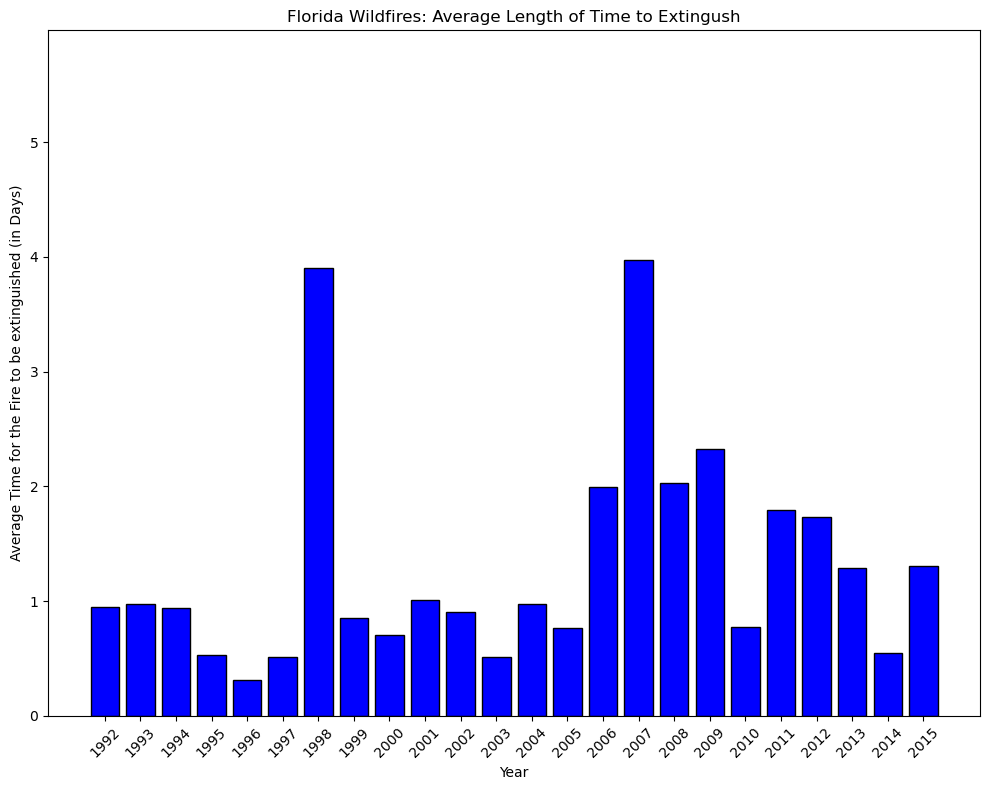

In [14]:
#set up x_axis, y_axis and tick locations for graphing
exting_x_axis = avg_extinguished_df.index 
exting_y_axis = avg_extinguished_df.values 
exting_tick_locations = [value for value in exting_x_axis]

#graph the number of fires by month to determine if there is a season more prone to fires
plt.figure(figsize=(10,8))
plt.bar(exting_x_axis, exting_y_axis, color="blue", edgecolor="black")
plt.ylim(0, max(exting_y_axis)+2)
plt.xticks(exting_tick_locations, rotation = 45)
plt.title("Florida Wildfires: Average Length of Time to Extingush")
plt.xlabel("Year")
plt.ylabel("Average Time for the Fire to be extinguished (in Days)")
plt.tight_layout()
plt.savefig("IMAGES/FL/Florida_extinguish_time.png")
plt.show()

In [15]:
#create a database to compare fire size as it changes over the years. 
fire_size_df = Florida_df[["FIRE_YEAR", "FIRE_SIZE"]]

#create bins and labels
bins = [0, 1, 100, 1000, 10000, 50000, 65000]
labels = ["<1 Acre", "<100 Acres", "<1000 Acres", "<10000 Acres", "<50000 Acres", "50000+ Acres"]

#bin the data and label each fire accordingly in a new column
fire_size_df["Fire Size Summary"] = pd.cut(fire_size_df["FIRE_SIZE"], 
                                              bins, labels=labels, 
                                              include_lowest=True)

#display the data
fire_size_df.head()


C:\Users\Tiffa\AppData\Local\Temp\ipykernel_18820\4074265494.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fire_size_df["Fire Size Summary"] = pd.cut(fire_size_df["FIRE_SIZE"],


FIRE_YEAR  FIRE_SIZE Fire Size Summary
855        2005      21.00        <100 Acres
883        2005       2.00        <100 Acres
1238       2005       5.00        <100 Acres
1240       2005      10.00        <100 Acres
3398       2006       0.25           <1 Acre

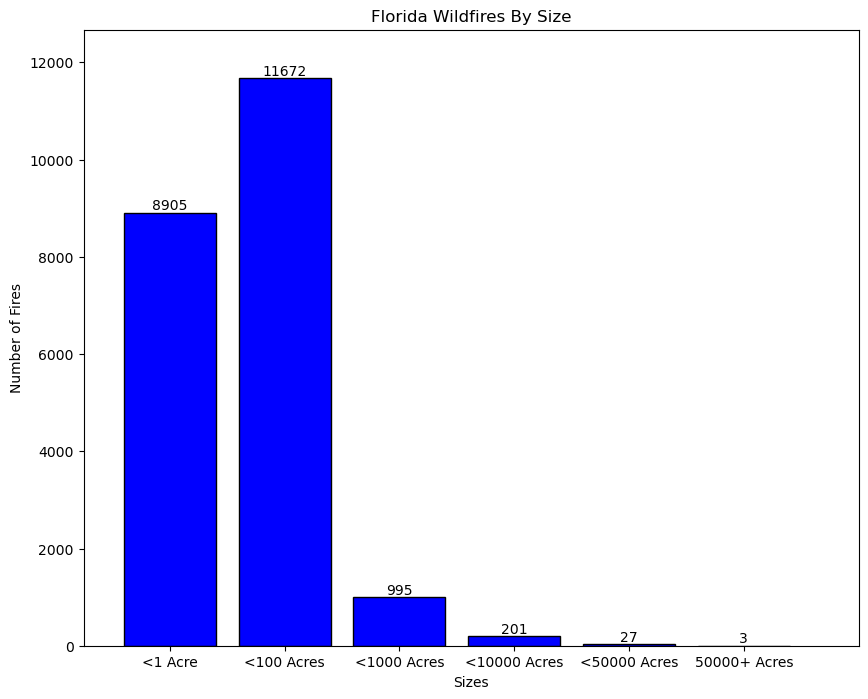

In [16]:
#count the number of each fire size
size_count = fire_size_df["Fire Size Summary"].value_counts()
size_count = size_count.sort_index()
sizes = size_count.index.sort_values()

#create x-axis and tick locations
size_x_axis = np.arange(len(sizes.unique()))
size_tick_locations = [value for value in size_x_axis]

#graph the data in a bar chart
plt.figure(figsize=(10,8))
plt.bar(size_x_axis, size_count, color='blue', edgecolor='black')
plt.xticks(size_tick_locations, sizes)
plt.xlim(-0.75, len(size_x_axis))
plt.ylim(0, max(size_count)+1000)
plt.title("Florida Wildfires By Size")
plt.xlabel("Sizes")
plt.ylabel("Number of Fires")
for i, value in enumerate(size_count):
    plt.text(i, value + 1, str(value), ha='center', va='bottom')
plt.savefig("IMAGES/FL/Florida_fire_by_Size.png")
plt.show()

In [17]:
#isolate out the data by the smallest fires, in preparation for graphing
smallest = fire_size_df.loc[fire_size_df["Fire Size Summary"] == "<1 Acre",:]
smallest_fires = smallest["FIRE_YEAR"].value_counts()
sm_years = smallest_fires.index.sort_values()
smallest_x_axis = np.arange(len(sm_years.unique()))
tick_locations = [value for value in smallest_x_axis]

#determine the linear regression and p value
(slope, intercept, rvalue, pvalue, stderr) = linregress(smallest_x_axis, smallest_fires)
regress_values = smallest_x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
p_value = "p = " + str(pvalue)


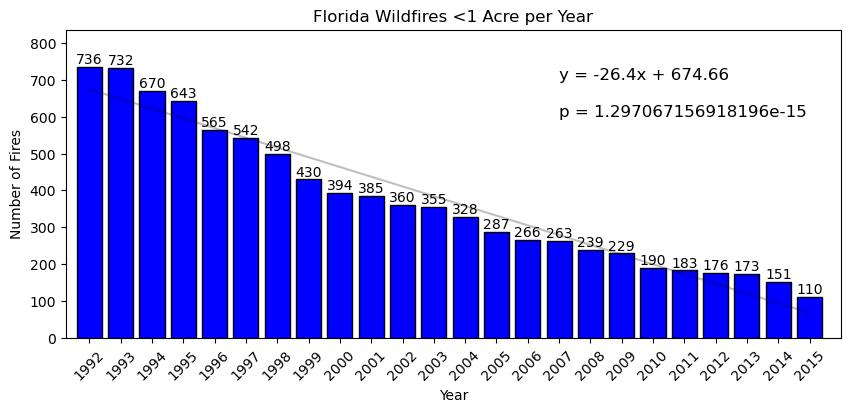

In [19]:
#graph the data for the smallest fires over the years
plt.figure(figsize=(10,4))
plt.bar(smallest_x_axis, smallest_fires, color='blue', edgecolor='black')
plt.xticks(tick_locations, sm_years, rotation=45)
plt.plot(smallest_x_axis, regress_values, color = "black", alpha=0.25)
plt.text(15, 700, line_eq, fontsize=12, color='black')
plt.text(15, 600, p_value, fontsize=12, color='black')
plt.xlim(-0.75, len(smallest_x_axis))
plt.ylim(0, max(smallest_fires)+100)
plt.title("Florida Wildfires <1 Acre per Year")
plt.xlabel("Year")
plt.ylabel("Number of Fires")
for i, value in enumerate(smallest_fires):
    plt.text(i, value + 1, str(value), ha='center', va='bottom')
plt.savefig("IMAGES/FL/Florida_less_than_one.png")
plt.show()

In [20]:
#isolate out the data fires that do not exceed 100 acres, in preparation for graphing
sec_small = fire_size_df.loc[fire_size_df["Fire Size Summary"] == "<100 Acres",:]
sec_small_fires = sec_small["FIRE_YEAR"].value_counts()
scsm_years = sec_small_fires.index.sort_values()
sec_small_x_axis = np.arange(len(scsm_years.unique()))
tick_locations = [value for value in sec_small_x_axis]

#determine the linear regression and p value
(slope, intercept, rvalue, pvalue, stderr) = linregress(sec_small_x_axis, sec_small_fires)
regress_values = sec_small_x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
p_value = "p = " + str(pvalue)


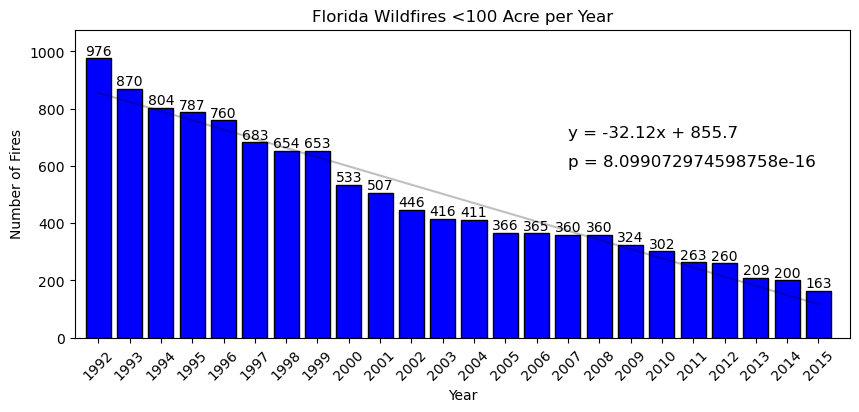

In [21]:
#graph the data for the fires that do not exceed 100 acres over the years
plt.figure(figsize=(10,4))
plt.bar(sec_small_x_axis, sec_small_fires, color='blue', edgecolor='black')
plt.xticks(tick_locations, scsm_years, rotation=45)
plt.plot(sec_small_x_axis, regress_values, color = "black", alpha=0.25)
plt.text(15, 700, line_eq, fontsize=12, color='black')
plt.text(15, 600, p_value, fontsize=12, color='black')
plt.xlim(-0.75, len(sec_small_x_axis))
plt.ylim(0, max(sec_small_fires)+100)
plt.title("Florida Wildfires <100 Acre per Year")
plt.xlabel("Year")
plt.ylabel("Number of Fires")
for i, value in enumerate(sec_small_fires):
    plt.text(i, value + 1, str(value), ha='center', va='bottom')
plt.savefig("IMAGES/FL/Florida_less_than_hundred.png")
plt.show()

In [22]:
#isolate out the data by the number of fires that do not exceed 1,000 acres, in preparation for graphing
thousand = fire_size_df.loc[fire_size_df["Fire Size Summary"] == "<1000 Acres",:]
thousand_fires = thousand["FIRE_YEAR"].value_counts()
th_years = thousand_fires.index.sort_values()
thousand_x_axis = np.arange(len(th_years.unique()))
tick_locations = [value for value in thousand_x_axis]

#determine the linear regression and p value
(slope, intercept, rvalue, pvalue, stderr) = linregress(thousand_x_axis, thousand_fires)
regress_values = thousand_x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
p_value = "p = " + str(pvalue)


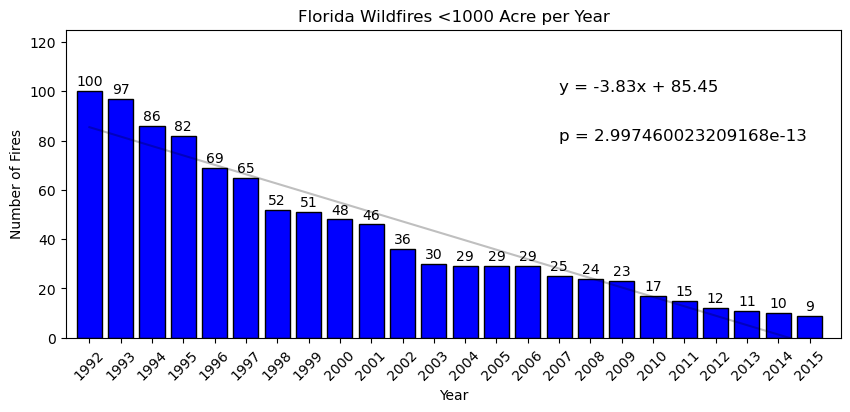

In [23]:
#graph the data for the fires that do not exceed 1,000 acres over the years
plt.figure(figsize=(10,4))
plt.bar(thousand_x_axis, thousand_fires, color='blue', edgecolor='black')
plt.xticks(tick_locations, th_years, rotation=45)
plt.plot(thousand_x_axis, regress_values, color = "black", alpha=0.25)
plt.text(15, 100, line_eq, fontsize=12, color='black')
plt.text(15, 80, p_value, fontsize=12, color='black')
plt.xlim(-0.75, len(thousand_x_axis))
plt.ylim(0, max(thousand_fires)+25)
plt.title("Florida Wildfires <1000 Acre per Year")
plt.xlabel("Year")
plt.ylabel("Number of Fires")
for i, value in enumerate(thousand_fires):
    plt.text(i, value + 1, str(value), ha='center', va='bottom')
plt.savefig("IMAGES/FL/Florida_less_than_thousand.png")
plt.show()

In [24]:
#isolate out the data by the number of fires that do not exceed 10,000 acres, in preparation for graphing
tn_thousand = fire_size_df.loc[fire_size_df["Fire Size Summary"] == "<10000 Acres",:]
tn_thousand_fires = tn_thousand["FIRE_YEAR"].value_counts()
tnth_years = tn_thousand_fires.index.sort_values()
tn_thousand_x_axis = np.arange(len(tnth_years.unique()))
tick_locations = [value for value in tn_thousand_x_axis]

#determine the linear regression and p value
(slope, intercept, rvalue, pvalue, stderr) = linregress(tn_thousand_x_axis, tn_thousand_fires)
regress_values = tn_thousand_x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
p_value = "p = " + str(pvalue)


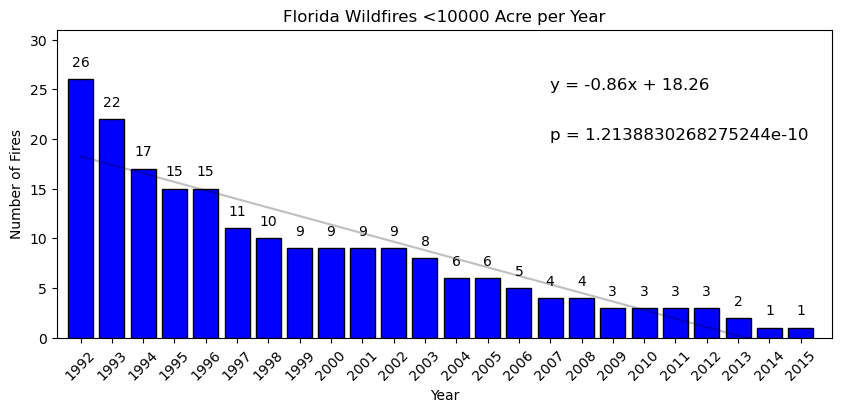

In [25]:
#graph the data for the fires that do not exceed 10,000 acres over the years
plt.figure(figsize=(10,4))
plt.bar(tn_thousand_x_axis, tn_thousand_fires, color='blue', edgecolor='black')
plt.xticks(tick_locations, tnth_years, rotation=45)
plt.plot(tn_thousand_x_axis, regress_values, color = "black", alpha=0.25)
plt.text(15, 25, line_eq, fontsize=12, color='black')
plt.text(15, 20, p_value, fontsize=12, color='black')
plt.xlim(-0.75, len(tn_thousand_x_axis))
plt.ylim(0, max(tn_thousand_fires)+5)
plt.title("Florida Wildfires <10000 Acre per Year")
plt.xlabel("Year")
plt.ylabel("Number of Fires")
for i, value in enumerate(tn_thousand_fires):
    plt.text(i, value + 1, str(value), ha='center', va='bottom')
plt.savefig("IMAGES/FL/Florida_less_than_ten_thousand.png")
plt.show()

In [26]:
#isolate out the data by the number of fires that do not exceed 50,000 acres, in preparation for graphing
ft_thousand = fire_size_df.loc[fire_size_df["Fire Size Summary"] == "<50000 Acres",:]
ft_thousand_fires = ft_thousand["FIRE_YEAR"].value_counts()
ftth_years = ft_thousand_fires.index.sort_values()
ft_thousand_x_axis = np.arange(len(ftth_years.unique()))
tick_locations = [value for value in ft_thousand_x_axis]

#determine the linear regression and p value
(slope, intercept, rvalue, pvalue, stderr) = linregress(ft_thousand_x_axis, ft_thousand_fires)
regress_values = ft_thousand_x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
p_value = "p = " + str(pvalue)


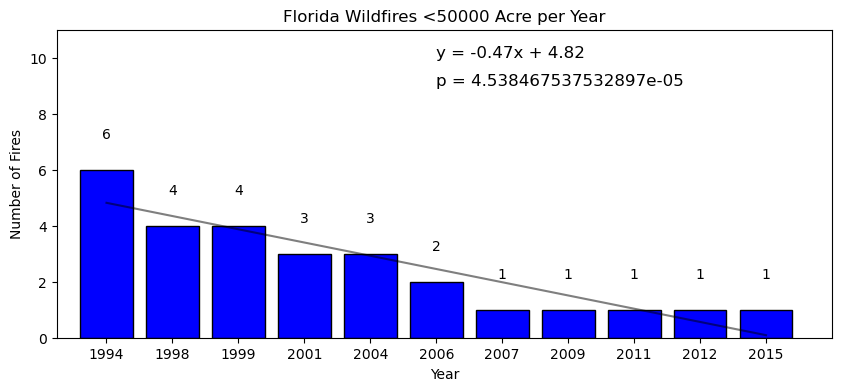

In [27]:
#graph the data for the fires that do not exceed 50,000 acres over the years
plt.figure(figsize=(10,4))
plt.bar(ft_thousand_x_axis, ft_thousand_fires, color='blue', edgecolor='black')
plt.xticks(tick_locations, ftth_years)
plt.plot(ft_thousand_x_axis, regress_values, color = "black", alpha=0.50)
plt.text(5, 10, line_eq, fontsize=12, color='black')
plt.text(5, 9, p_value, fontsize=12, color='black')
plt.xlim(-0.75, len(ft_thousand_x_axis))
plt.ylim(0, max(ft_thousand_fires)+5)
plt.title("Florida Wildfires <50000 Acre per Year")
plt.xlabel("Year")
plt.ylabel("Number of Fires")
for i, value in enumerate(ft_thousand_fires):
    plt.text(i, value + 1, str(value), ha='center', va='bottom')
plt.savefig("IMAGES/FL/Florida_less_than_fifty_thousand.png")
plt.show()

In [28]:
#isolate out the data by the number of fires that exceed 50,000 acres, in preparation for graphing
plus = fire_size_df.loc[fire_size_df["Fire Size Summary"] == "50000+ Acres",:]
plus_fires = plus["FIRE_YEAR"].value_counts()
plus_years = plus_fires.index.sort_values()
plus_x_axis = np.arange(len(plus_years.unique()))
tick_locations = [value for value in plus_x_axis]

#determine the linear regression and p value
(slope, intercept, rvalue, pvalue, stderr) = linregress(plus_x_axis, plus_fires)
regress_values = plus_x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
p_value = "p = " + str(pvalue)

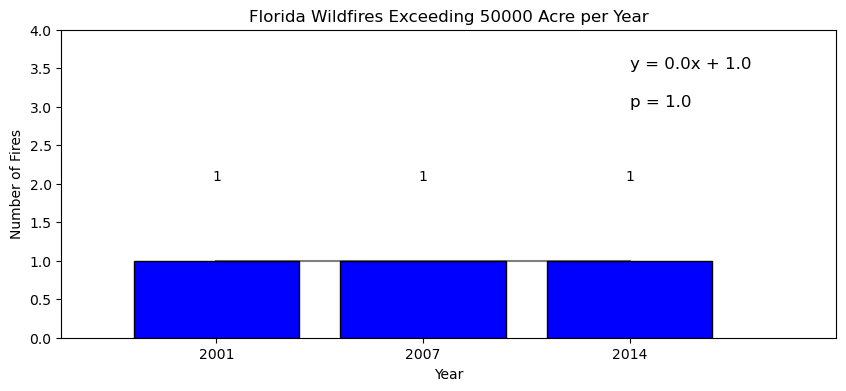

In [29]:
#graph the data for the fires that exceed 50,000 acres over the years
plt.figure(figsize=(10,4))
plt.bar(plus_x_axis, plus_fires, color='blue', edgecolor='black')
plt.xticks(tick_locations, plus_years)
plt.plot(plus_x_axis, regress_values, color = "black", alpha=0.50)
plt.text(2, 3.5, line_eq, fontsize=12, color='black')
plt.text(2, 3, p_value, fontsize=12, color='black')
plt.xlim(-0.75, len(plus_x_axis))
plt.ylim(0, max(plus_fires)+3)
plt.title("Florida Wildfires Exceeding 50000 Acre per Year")
plt.xlabel("Year")
plt.ylabel("Number of Fires")
for i, value in enumerate(plus_fires):
    plt.text(i, value + 1, str(value), ha='center', va='bottom')
plt.savefig("IMAGES/FL/Florida_greater_than_fifty_thousand.png")
plt.show()

In [30]:
#determine the number of fires per state
fire_count = Florida_df["FIRE_YEAR"].count()
fire_count

21806

In [31]:
#calculate the number of fires exceeding 50,000 acres
big_fire_count = fire_size_df.loc[fire_size_df["Fire Size Summary"] == "50000+ Acres",:]
big_fire_count["FIRE_YEAR"].count()

3